# Regresja

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Boston

In [28]:
boston = datasets.load_boston()
# print description
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [29]:
# get the data
boston_X = boston.data
boston_Y = boston.target

Podzielmy zbiór na część testową i treningową .

In [30]:
# Split the data into training/testing sets
boston_X_train = boston_X[:-50]
boston_X_test = boston_X[-50:]
 
# Split the targets into training/testing sets
boston_y_train = boston_Y[:-50]
boston_y_test = boston_Y[-50:]

Wykonajmy regresję:

- klasyczną  
- regresję grzbietową (Ridge)
- regresję Lasso
- Elastic Net

Wyznaczmy dla nich 

- mean square error
- normę l1 wektora $w$
- normę l2 wektora $w$

In [31]:
regressors = {}
regressors['LinReg'] =linear_model.LinearRegression()
regressors['Ridge'] = linear_model.Ridge(alpha = .5)
regressors['Lasso'] = linear_model.Lasso(alpha = 5.1)
regressors['ElNet'] = linear_model.ElasticNet(alpha = .5, l1_ratio=0.5)

In [32]:
fit_results={}
for key in regressors:
    # Train the model using the training sets
    regr = regressors[key]
    regr.fit(boston_X_train, boston_y_train)
    # mean square error
    mse = np.mean((regr.predict(boston_X_test) - boston_y_test) ** 2)
    w = regr.coef_
    # l1 norm
    wl1 = np.sum(np.abs(w))
    # l2 norm
    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key]= { 'mse': mse, 'wl2': wl2, 'wl1': wl1, 'w': w}
    print("{}\n----------\n  mse={}\n  wl1={}\n  wl2={}\n  w={}\n ".format(key,mse,wl1,wl2,w))
    

LinReg
----------
  mse=10.966543166781298
  wl1=27.474977159935868
  wl2=18.331352794471986
  w=[ -1.04755725e-01   4.91233643e-02   3.24299720e-02   2.51517135e+00
  -1.76585750e+01   3.81259444e+00   1.06438518e-02  -1.43651798e+00
   3.60959247e-01  -1.54635990e-02  -9.13025678e-01   9.94705988e-03
  -5.55769911e-01]
 
Ridge
----------
  mse=11.202006830364176
  wl1=22.473861526123482
  wl2=13.739734567660516
  w=[ -1.01151222e-01   5.01860418e-02   9.02971097e-03   2.45184448e+00
  -1.28438453e+01   3.83670637e+00   6.49816975e-03  -1.37747380e+00
   3.52695391e-01  -1.62635651e-02  -8.56393789e-01   9.98116918e-03
  -5.61792537e-01]
 
Lasso
----------
  mse=15.166428699321429
  wl1=0.8815283433978962
  wl2=0.7836758782991127
  w=[-0.          0.04108068 -0.          0.          0.          0.
  0.04466574 -0.          0.         -0.00861895 -0.          0.00591012
 -0.78125285]
 
ElNet
----------
  mse=13.90044711810222
  wl1=4.904536607641147
  wl2=2.347192210370398
  w=[-0.0871

Możemy przedstawić wyniki w formie graficznej:

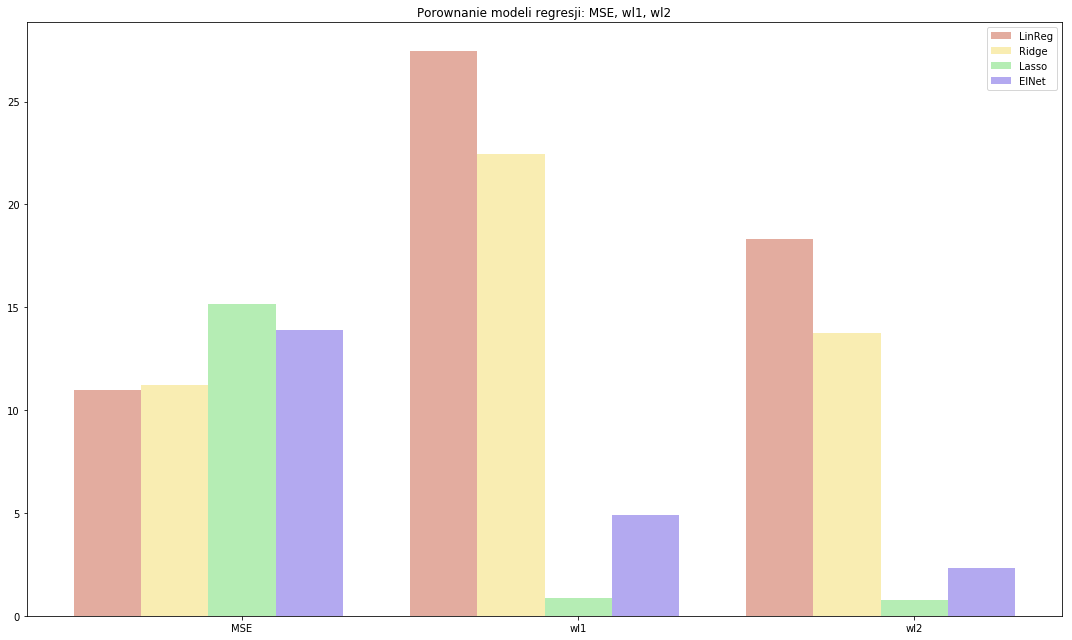

In [34]:
groups = 3
index = np.arange(groups)
bar_width = .2
opacity = 0.4
 
fig, ax = plt.subplots(figsize=(15,9))
 
t=0
for key in regressors:
     
    results = fit_results[key]
    res_val = (results['mse'],results['wl1'],results['wl2'])
    plt.bar(index+ bar_width*t, res_val, bar_width,
        alpha=opacity,
        color=np.random.rand(3,1),
        label=key)
    t+=1
    
#plt.xlabel('Modele regresji')
plt.title('Porownanie modeli regresji: MSE, wl1, wl2')
plt.xticks(index + (t-2)*bar_width, ('MSE', 'wl1', 'wl2'))
plt.legend()
 
plt.tight_layout()
plt.show()

# Zadanie
Wykonaj analogiczne zadanie jak powyżej, dobierając optymalne parametr $\alpha$ dla 

- regresji klasycznej (tu nie ma parametru $\alpha$)  
- regresji grzbietową (Ridge)
- regresji Lasso
- Elastic Net

Wyznaczmy dla nich 

- mean square error
- normę l1 wektora $w$
- normę l2 wektora $w$

Wyniki przedstaw w postaci graficznej. 